# Performance Evaluation of Machine Learning Algorithms
## Özgün G
###

#

## Decision Tree Performance Evaluation

### Evaluation With First Parameters /  params = {'max_leaf_nodes': list(range(2, 500)), 'min_samples_split': [2, 3, 4]} 

In [216]:
##Generate a moons dataset using make_moons(n_samples=10000, noise=0.4). 
from sklearn.datasets import make_moons 

In [217]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42) 

In [218]:
##Split it into a training set and a test set using train_test_split(). 
from sklearn.model_selection import train_test_split 

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [220]:
#Ugrid search
from sklearn.tree import DecisionTreeClassifier 

In [221]:
params = {'max_leaf_nodes': list(range(2, 500)), 'min_samples_split': [2, 3, 4]} 
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)

In [222]:
grid_search_cv.fit(X_train, y_train) 
grid_search_cv.best_estimator_ 

Fitting 3 folds for each of 1494 candidates, totalling 4482 fits


DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

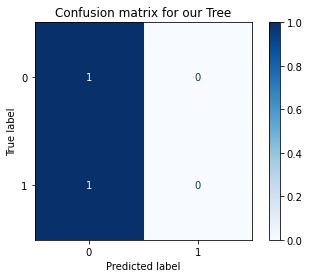

In [223]:
# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our Tree')
plt.show(matrix)
plt.show()

#### Accuracy Calculation For Decision Tree

In [224]:
from sklearn.metrics import accuracy_score 
y_pred = grid_search_cv.predict(X_test) 
accuracy_score(y_test, y_pred) 

0.8695

#### Precision-Recall Calculation For Decision Tree

In [225]:
# Compute the average precision score
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred, average='micro')
print(average_precision)

0.8211654835847382


#### Mean Squared Error Calculation For Decision Tree

In [226]:
#compute the mean_squared_error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.1305

#### ROC(Receiver Operating Characteristic) Curve Calculation For Decision Tree

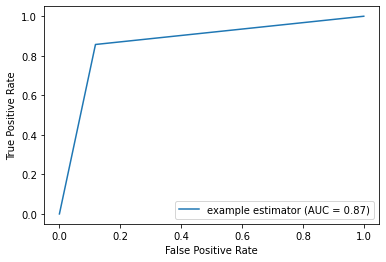

In [228]:
#ROC Curve Calculation
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

#

### Evaluation For Decision Tree With Other Parameters /  params = {'min_weight_fraction_leaf':[0,0.5],'max_depth':[1,5,9],'max_leaf_nodes': list(range(2, 500)), 'min_samples_split': [2, 3, 4]} 


######

In [236]:
params = {'min_weight_fraction_leaf':[0,0.5],'max_depth':[1,5,9],'max_leaf_nodes': list(range(2, 500)), 'min_samples_split': [2, 3, 4]} 
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)

In [237]:
grid_search_cv.fit(X_train, y_train) 
grid_search_cv.best_estimator_ 

Fitting 3 folds for each of 8964 candidates, totalling 26892 fits


DecisionTreeClassifier(max_depth=9, max_leaf_nodes=48,
                       min_weight_fraction_leaf=0, random_state=42)

#### Accuracy Calculation For Second Decision Tree

In [238]:
from sklearn.metrics import accuracy_score 
y_pred = grid_search_cv.predict(X_test) 
accuracy_score(y_test, y_pred) 

0.8605

#### Precision-Recall Calculation For Second Decision Tree

In [239]:
# Compute the average precision score
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred, average='micro')
print(average_precision)

0.8130484773391672


#### Mean Squared Error Calculation For Second Decision Tree

In [240]:
#compute the mean_squared_error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.1395

#### ROC(Receiver Operating Characteristic) Curve Calculation For Second Decision Tree

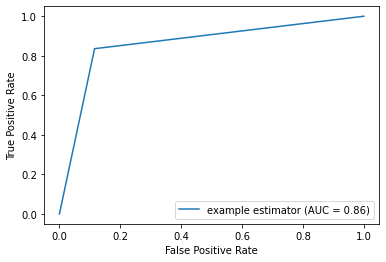

In [241]:
#ROC Curve Calculation
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

#

## SVM Classifier Tree Performance Evaluation

In [256]:
# Common imports 
import numpy as np 

In [257]:
# to make this notebook's output stable across runs 
np.random.seed(42) 
from sklearn.svm import SVC, LinearSVC 
from sklearn.preprocessing import StandardScaler 

In [258]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [259]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [260]:
np.random.seed(42) 
rnd_idx = np.random.permutation(6000) 
X_train = X_train[rnd_idx] 
y_train = y_train[rnd_idx]

In [261]:
lin_clf = LinearSVC(random_state=42) 
lin_clf.fit(X_train, y_train) 

LinearSVC(random_state=42)

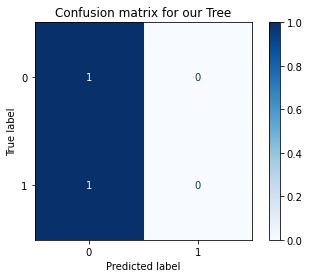

In [262]:
# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our Tree')
plt.show(matrix)
plt.show()

#### Accuracy Calculation For SVM

In [133]:
from sklearn.metrics import accuracy_score 
y_pred = lin_clf.predict(X_train) 
accuracy_score(y_train, y_pred) 

0.83

In [244]:
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32)) 
X_test_scaled = scaler.transform(X_test.astype(np.float32)) 

#### Accuracy Calculation After Scale 

In [245]:
lin_clf = LinearSVC(random_state=42) 
lin_clf.fit(X_train_scaled, y_train) 
y_pred = lin_clf.predict(X_train_scaled) 
accuracy_score(y_train, y_pred) 

0.829375

#### Precision-Recall Calculation For Second Decision Tree

In [252]:
# Compute the average precision score
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred, average='micro')
print(average_precision)

0.8143431249530468


#### Mean Squared Error Calculation For Second Decision Tree

In [253]:
#compute the mean_squared_error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.1325

#### ROC(Receiver Operating Characteristic) Curve Calculation For Second Decision Tree

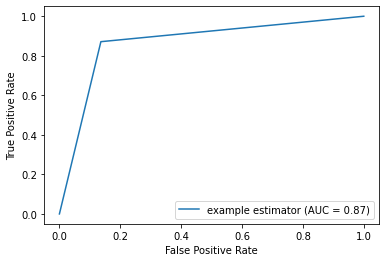

In [254]:
#ROC Curve Calculation
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()